In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [50]:
df.shape

(8124, 23)

In [51]:
pd.set_option('display.max_rows',None)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [53]:
#Statical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


since all the features are of object type, it describes the total number of unique elements in each column.

#### Univariate analysis

In [54]:
col=df.columns
len(col)

23

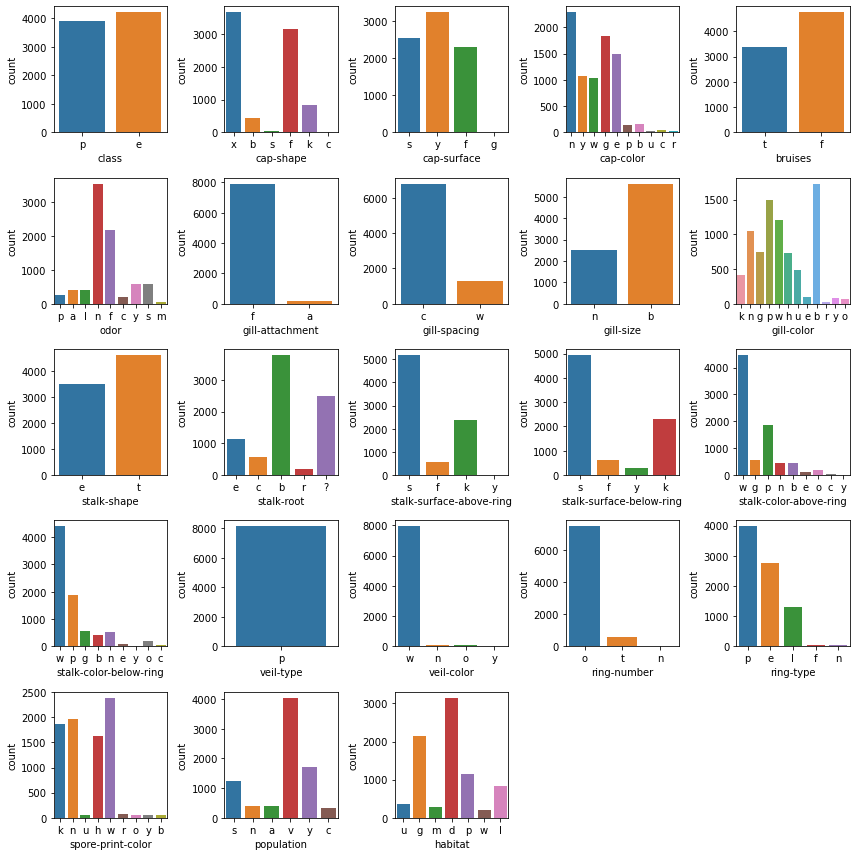

In [55]:
# plotting countplot for each feature and target
plt.figure(figsize=(12,12))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],data=df)
    plt.tight_layout()


observations:
.data is balanced as count of both target variables(class) is almost similar.
.gill-attachment is mostly of 'f' type than any other type
.gill-spacing is mostly of 'c' type which is significantly higher than any other category.
.there are very few observations having 'y' and 'c' stalk-color-above-ring or stalk-color-below-ring
.veil-type has only one category so we need not to use this attribute for modeling.(will drop this column later)
.almost all the samples have 'w' veil-color. only a few samples have 'o','n' or 'y' veil-color
.most of the samples have 'o' ring-number. only a few samples have 't' or 'n' ring-number.

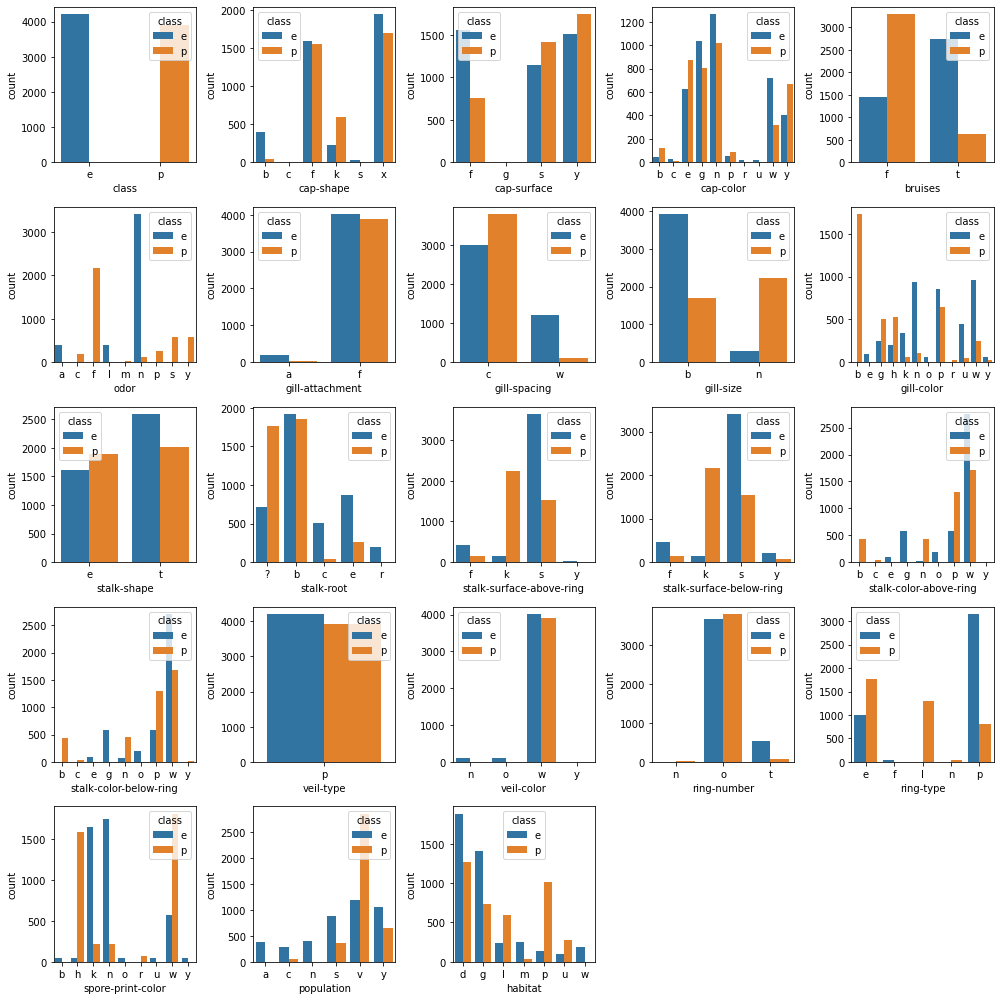

In [56]:
df=df.astype('category')
df.dtypes# countplot for each feature with repect to target variable
plt.figure(figsize=(14,14))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],hue='class',data=df)
    plt.tight_layout()

observations:
.bruises with t-type are mostly edible while with f-type are poisonous
.odor with a,l and n types are mostly edible while with p,f,c,y and c types are poisonous
.gill-spacing with w type are mostly edible
.gill-size with mostly n-type are poisonous while with b type are mostly edible.
.gill-colour of b-type is almost poisonous.
.stalk-shape of e-type are mostly poisonous while with t-type are mostly edible.
.stalk-root of r-type is mostly edible
.stalk-surface-above-ring of k type is mostly poisnous
.spore-print-color of k and n type are mostly edible while of h and w type are poisonous.
.population of n and a type are mostly edible

#### Data Cleaning

In [57]:
df.drop('veil-type',axis=1,inplace=True)

Feature Engineering

In [58]:
le=LabelEncoder()
col=df.columns
for i in col:
    df[i]=le.fit_transform(df[i])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


for class 1- poisonous and 0- edible

### Splitting data into X and Y

In [59]:
x=df.drop('class',axis=1)
y=df['class']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

### ML Modelling

### Logistic regression

In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.9499589827727646
confusion matrix 
 [[1200   57]
 [  65 1116]]
classification report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



.accuracy-100%
.false poisonous-0 (actually edible but predicted poisonous)
.false edible-0 (actually poisonous but predicted edible)

lets check for cross validation

In [67]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    y_pred=lr.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.6301538461538462
accuracy score  0.984
accuracy score  0.8756923076923077
accuracy score  0.9981538461538462
accuracy score  0.7136699507389163
mean accuracy score 0.8403339901477832


Decision tree classifier

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  1.0
confusion matrix 
 [[1257    0]
 [   0 1181]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



.accuracy-100%
.false poisonous-0 (actually edible but predicted poisonous)
.false edible-0 (actually poisonous but predicted edible)

lets check for cross validation

In [74]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dt.fit(xtrain,ytrain)
    y_pred=dt.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8818461538461538
confusion matrix
 [[841   0]
 [192 592]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.7438423645320197
confusion matrix
 [[433 408]
 [  8 775]]
mean accuracy score 0.9251377036756347


mean accuracy score of decision tree is better than logistic regression
decision tree is better than logistic regression

Random forest classifier

In [76]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  1.0
confusion matrix 
 [[1257    0]
 [   0 1181]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



.accuracy-100%
.false poisonous-0 (actually edible but predicted poisonous)
.false edible-0 (actually poisonous but predicted edible)

In [78]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8424615384615385
confusion matrix
 [[841   0]
 [256 528]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.6391625615763546
confusion matrix
 [[255 586]
 [  0 783]]
mean accuracy score 0.8963248200075787


.mean accuracy score of random forest is better than logistic regression but almost similar to decision tree
.it shows false edible only in one fold but it is quite higher than the decision tree.

#### lets try some hyperparameter tuning

since only decision tree and random forest performed better, so we will only tune these two algorithms

### Decision tree tuning

In [79]:
params={'criterion':['gini', 'entropy'],
        'max_depth':[3,4,5,6,7,8,9,10],
        'splitter':['best','random'],
        'min_samples_split':[2,4,6,10,12],
        'min_samples_leaf':[1,2,3,4],
        'max_features':['sqrt','log2',None],
        'random_state':[42,]}

dt_reg=GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

dt_reg.fit(x_train,y_train)
print('best score ',dt_reg.best_score_)
dtbest=dt_reg.best_estimator_
print(dtbest)

best score  1.0
DecisionTreeClassifier(max_depth=7, random_state=42)


In [81]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dtbest.fit(xtrain,ytrain)
    y_pred=dtbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8572307692307692
confusion matrix
 [[801  40]
 [192 592]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.6896551724137931
confusion matrix
 [[337 504]
 [  0 783]]
mean accuracy score 0.9093771883289126


.hyperparameter tuning didnt help in improving the accuracy of decision tree :(
.but the false edible are reduced after tuning which is good, although false poisonous are increased.

#### Random forest tuning

In [82]:
para={'criterion':['gini','entropy'],
     'max_depth':[5,6,7,8],
     'min_samples_split':[2,4],
     'min_samples_leaf':[1,2],
      'random_state':[42,],
     'max_samples':[int(i) for i in np.linspace(1000,5100,5)]
     } 

rf_reg=GridSearchCV(estimator=rf,
                    param_grid=para,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

rf_reg.fit(x_train,y_train)
print('best score ',rf_reg.best_score_)
rfbest=rf_reg.best_estimator_
print(rfbest)

best score  1.0
RandomForestClassifier(max_depth=8, max_samples=2025, random_state=42)


In [83]:
kfold=StratifiedKFold(n_splits=5) 
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rfbest.fit(xtrain,ytrain)
    y_pred=rfbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8424615384615385
confusion matrix
 [[841   0]
 [256 528]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.9612307692307692
confusion matrix
 [[842   0]
 [ 63 720]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.5584975369458128
confusion matrix
 [[124 717]
 [  0 783]]
mean accuracy score 0.8724379689276243


hyperparameter tuning didnt improve the model accuracy also the false edible are alsso too high

#### so the best model is decision tree without hyperparameter tuning because it has good accuracy score as well as very low false edible as well as poisonous count as compared to other models

#### now lets train the model with complete data

In [84]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

### saving the model

In [85]:
joblib.dump(dt,'mushroom.pkl')

['mushroom.pkl']

### loading the saved model

In [90]:
model=joblib.load('mushroom.pkl')
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

1.0